In [192]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [193]:
#load the data
data=pd.read_csv("../../data/01-modified-data/cleaned_supervised_data.csv")
#sample the negative data to make it balaced
a=data[data["label"]==0].sample(100)
b=data[data['label']==1]
data=pd.concat([a,b])
data.reset_index(drop=True, inplace=True)
y=data["label"]
data["description"]=data["description"].fillna("")
data


,text,location,friends_count,followers_count,screen_name,retweet_count,favorite_count,label,description
0,rt kl_coop every year an unknown number of a...,USA,998,1066,glevns,58,0,0,news editor bbcnorthamerica gareth lewis ev...
1,dallas stars roster projection wyatt johnston...,"Dallas, Texas",785,771406,dallasnews,1,0,0,the official dallas morning news twitter accou...
2,kaufman mixed use project will be anchored by ...,"Dallas, Texas",785,771406,dallasnews,0,2,0,the official dallas morning news twitter accou...
3,ask amy what should i have done when this man...,"Silicon Valley, CA",1890,277210,mercnews,0,0,0,latest silicon valley and san francisco bay ar...
4,dallas police chief elected president of major...,"Dallas, Texas",785,771406,dallasnews,0,6,0,the official dallas morning news twitter accou...
...,...,...,...,...,...,...,...,...,...
195,watch at a recent school board meeting it wa...,Depths of Hell,675,1566691,Libs of TikTok,2902,8905,1,all videos belong to their respective owners ...
196,freedom convoy fringeminority aboriginal s...,NaN,2456,1249,President-Elect - Lo-Gen,6,14,1,the truth hurts only when you can t han...
197,over truck convoy in support of canadian oil ...,"Edmonton, Alberta",3091,21971,Frank McVeety,140,345,1,if you appreciate the truth follow me as i sta...
198,ukrainian citizens destroy russian tanks with...,"Pune, India",30,56,Mayuresh,1178,7558,1,not a scholar but wise not a dreamy but ambi...


In [194]:
#count the frequency of words
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data.text)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())
vectorizer = CountVectorizer()
matrix2 = vectorizer.fit_transform(data.description)
Y = pd.DataFrame(matrix2.toarray(),columns=vectorizer.get_feature_names_out())
X=pd.concat([X,Y],ignore_index=True,axis=1)
#add other features
X["favorite_count"]=data["favorite_count"]
X["retweet_count"]=data["retweet_count"]

In [195]:
#divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [196]:
# build and fit the model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)


c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [197]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)


0.8

In [198]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[35, 10],
       [ 6, 29]], dtype=int64)

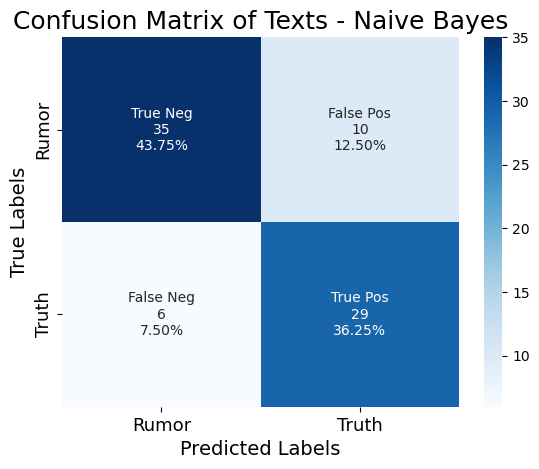

In [199]:
# visualize the confusion Matirx
# customize the anno
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#plot the heatmap
fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
plt.title("Confusion Matrix of Texts - Naive Bayes",fontsize=18)
fig.set_xticklabels(["Rumor","Truth"],fontsize=13)
fig.set_yticklabels(["Rumor","Truth"],fontsize=13)
fig.set_xlabel("Predicted Labels",fontsize=14)
fig.set_ylabel("True Labels",fontsize=14)
plt.show()
heatmap = fig.get_figure()
# save the picture
heatmap.savefig("../../501-project-website/images/confusion_matirx_text_naive_bayes")


c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Yifan\anaconda3\envs\ANLY501\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised i

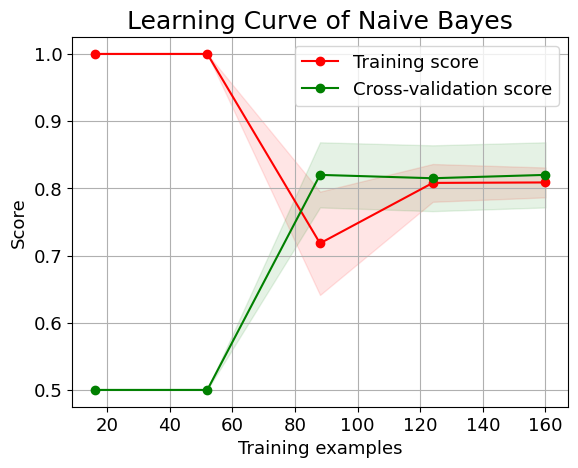

In [200]:
#plot the learning Curve
import scikitplot as skplt
probas_list=[y_predict]
clf_names=["Naive Bayes"]
a=skplt.estimators.plot_learning_curve(clf, X, y,text_fontsize=13)
plt.title("Learning Curve of Naive Bayes",fontsize=18)
plt.show()
curve=a.get_figure()
curve.savefig("../../501-project-website/images/learning_curve_text_naive_bayes")

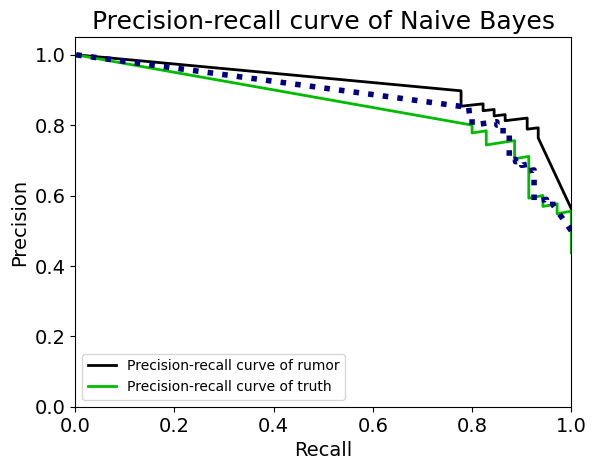

In [201]:
#plot the Precision-recall curve
skplt.metrics.plot_precision_recall(y_true=y_test, y_probas=predicted_probas,text_fontsize=14)
plt.legend(['Precision-recall curve of rumor',"Precision-recall curve of truth"])
plt.title("Precision-recall curve of Naive Bayes",fontsize=18)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.savefig("../../501-project-website/images/PR_curve_naive_bayes")